## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mm = pd.read_csv(mouse_metadata_path)
sr = pd.read_csv(study_results_path)


# Combine the data into a single dataset
merged = pd.merge(mm, sr, how ='inner', on ='Mouse ID')
# Display the data table for preview
merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
merged.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged['duplicate'] = merged.duplicated(subset=['Mouse ID','Timepoint'],keep=False)
duplicate_mid = merged.loc[merged['duplicate']==True]['Mouse ID']



In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
for mid in duplicate_mid:
    merged = merged[merged['Mouse ID'] != mid]

In [6]:
# Checking the number of mice in the clean DataFrame.
merged.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
duplicate             1880
dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
c1 = merged.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean().rename('Mean TV').to_frame()
c2 = merged.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median().rename('Median TV').to_frame()
c3 = merged.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var().rename('Var TV').to_frame()
c4 = merged.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std().rename('Std TV').to_frame()
c5 = merged.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem().rename('Sem TV').to_frame()
c1.join(c2).join(c3).join(c4).join(c5)


,Mean TV,Median TV,Var TV,Std TV,Sem TV
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
functions = {'Tumor Volume (mm3)': ['mean', 'median', 'var','std','sem']}
merged_stats = merged.groupby('Drug Regimen').agg(functions)['Tumor Volume (mm3)']
merged_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

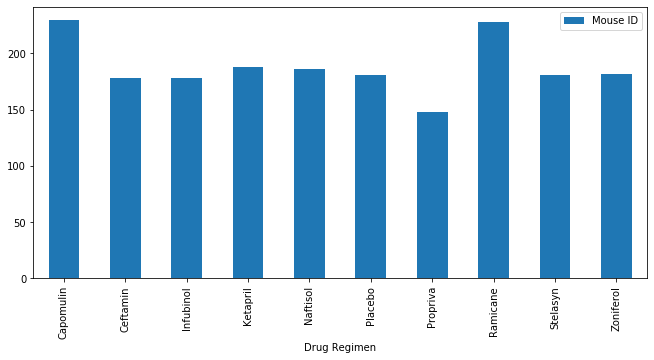

In [28]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

dr_counts = merged.groupby(['Drug Regimen']).count()["Mouse ID"].to_frame()
dr_counts.plot.bar(figsize=(11,5))


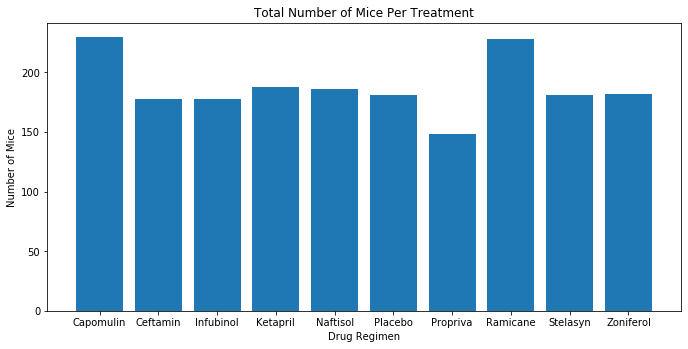

In [24]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

fig = plt.figure(figsize=(8.8,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(dr_counts.index,dr_counts["Mouse ID"])
plt.title("Total Number of Mice Per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
#plt.legend(handles=[dr_counts.index[0], dr_counts[0]], loc='best')
plt.show()

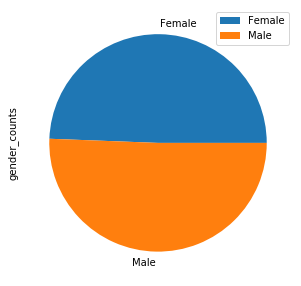

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_counts = merged.groupby(['Sex']).count()["Mouse ID"].rename('gender_counts').to_frame()
gender_counts.plot.pie(y = 'gender_counts',figsize=(11,5))

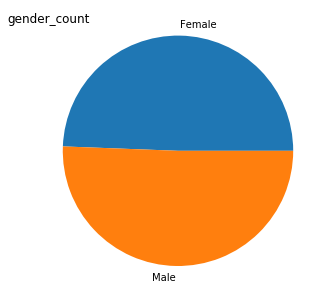

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

fig = plt.figure(figsize=(9,4))
ax = fig.add_axes([0,0,1,1])
ax.set_title='gender_counts'
ax.pie(gender_counts['gender_counts'],labels=['Female','Male'])
fig.suptitle("gender_count",x=0.3)
plt.show()

## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
promised_merged = merged.loc[merged['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_promised_merged = promised_merged.iloc[promised_merged.reset_index().groupby(['Mouse ID'])['Timepoint'].idxmax()]
max_promised_merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,duplicate
463,a203,Infubinol,Female,20,23,45,67.973419,2,False
473,a251,Infubinol,Female,21,25,45,65.525743,1,False
493,a275,Ceftamin,Female,20,28,45,62.999356,3,False
327,a411,Ramicane,Male,3,22,45,38.407618,1,False
430,a444,Ramicane,Female,10,25,45,43.047543,0,False
...,...,...,...,...,...,...,...,...,...
1845,y769,Ceftamin,Female,6,27,45,68.594745,4,False
124,y793,Capomulin,Male,17,17,45,31.896238,2,False
1855,y865,Ceftamin,Male,23,26,45,64.729837,3,False
84,z578,Ramicane,Male,11,16,45,30.638696,0,False


In [37]:
# Put treatments into a list for for loop (and later for plot labels)

def q1(x):
    return x.quantile(0.25)
def q3(x):
    return x.quantile(0.75)


functions = {'Tumor Volume (mm3)': ['median', 'std', q1,q3]}
mpm_stats = max_promised_merged.groupby('Drug Regimen').agg(functions)
#get rid of hirarchical column
mpm_stats = mpm_stats['Tumor Volume (mm3)']
#build new column qrt
mpm_stats['QRT'] = mpm_stats['q3']-mpm_stats['q1']
mpm_stats

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

,median,std,q1,q3,QRT
Drug Regimen,,,,,
Capomulin,38.125164,5.715188,32.377357,40.159220,7.781863
Ceftamin,59.851956,8.365568,48.722078,64.299830,15.577752
Infubinol,60.165180,8.602957,54.048608,65.525743,11.477135
Ramicane,36.561652,5.671539,31.560470,40.659006,9.098537


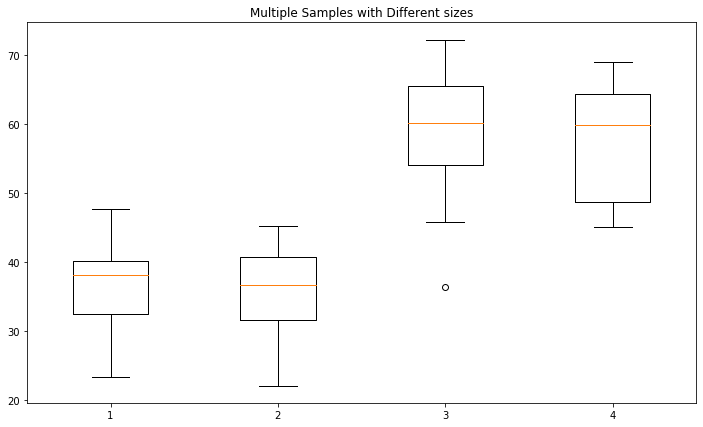

In [38]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [max_promised_merged[max_promised_merged['Drug Regimen']==drr]['Tumor Volume (mm3)'] for drr in ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] ]

fig7, ax7 = plt.subplots(figsize=(12,7))
ax7.set_title('Multiple Samples with Different sizes')
ax7.boxplot(data)

plt.show()

## Line and Scatter Plots

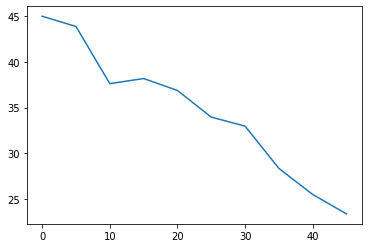

In [39]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
selected_mouse = merged[merged['Mouse ID']=='s185']
plt.plot(selected_mouse['Timepoint'], selected_mouse['Tumor Volume (mm3)'])
# plt.plot(selected_mouse['Timepoint'],selected_mouse['Weight (g)'])

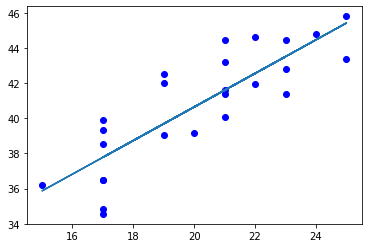

In [45]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin = merged[merged['Drug Regimen']=='Capomulin']


avg_capomulin = capomulin.groupby(['Mouse ID']).mean()[['Weight (g)','Tumor Volume (mm3)']]
x,y = avg_capomulin['Weight (g)'],avg_capomulin['Tumor Volume (mm3)']

# Linear regression coefficients:
coef = np.polyfit(x,y,1)
# Put the result of linear regression into a line format:
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y


#draw dots and line at the same time:
plt.plot(x,y, 'bo', x, poly1d_fn(x))

## Correlation and Regression

In [51]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print('correlation coef: ',np.corrcoef(x,y)[0][1],np.corrcoef(x,y)[1][0])
print('regression coef: ',coef[0],coef[1])

correlation coef:  0.8419363424694717 0.8419363424694717
regression coef:  0.9544396890241045 21.55216053268501
